In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [46]:
conv= nn.Conv2d(3,16,kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [3]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [6]:
from torchvision import datasets, transforms
data_path = '../datasets/p1ch7/cifar10'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [7]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [8]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [47]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

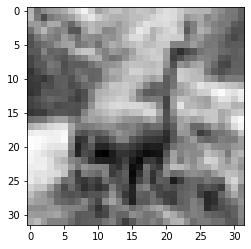

In [48]:
plt.imshow(img.mean(0), cmap='gray')
plt.show()

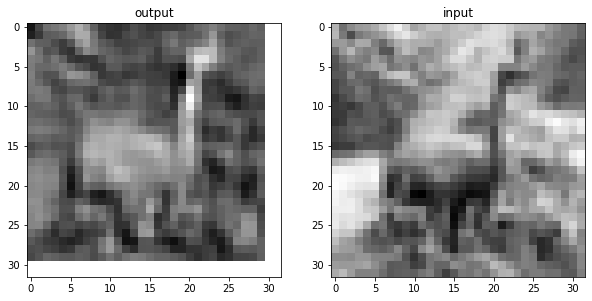

In [49]:
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.savefig('Ch8_F2_PyTorch.png')
plt.show()

In [56]:
conv=nn.Conv2d(3,1,kernel_size=3, padding=1)

In [51]:
output=conv(img.unsqueeze(0))

In [52]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [57]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

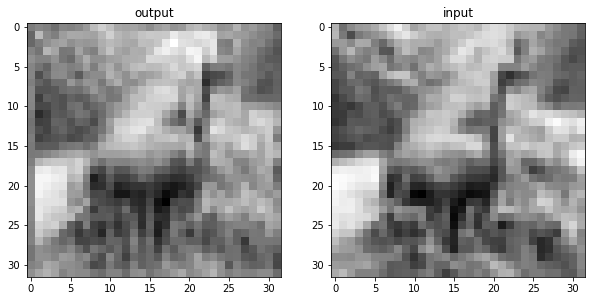

In [58]:
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.savefig('Ch8_F2_PyTorch.png')
plt.show()

In [59]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

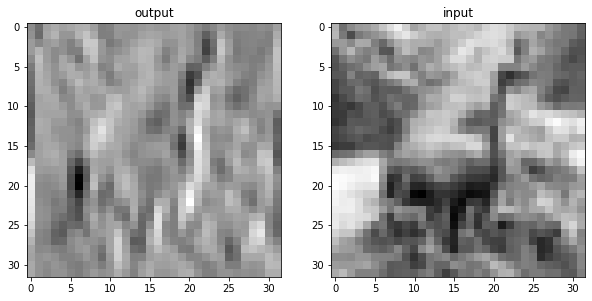

In [60]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

In [61]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [62]:
model.parameters()

<generator object Module.parameters at 0x7fdcfcc90190>

In [64]:
numel_list = [p.numel() for p in model.parameters()]
list_par= [p for p in model.parameters()]
sum(numel_list), numel_list, list_par

(18090,
 [432, 16, 1152, 8, 16384, 32, 64, 2],
 [Parameter containing:
  tensor([[[[ 1.6118e-01,  3.8820e-02, -1.1612e-01],
            [ 1.1584e-01, -1.6247e-01,  5.7391e-02],
            [-5.5294e-02, -3.1698e-02, -1.4876e-01]],
  
           [[ 3.6162e-02, -1.1897e-01,  1.8049e-01],
            [ 3.1621e-02, -1.6154e-01, -1.0024e-01],
            [ 1.2944e-01,  1.2646e-01, -8.2421e-02]],
  
           [[ 5.7636e-02,  8.7620e-02, -1.7282e-01],
            [ 9.0919e-02, -1.2663e-01, -5.1313e-02],
            [ 1.8517e-02,  1.2279e-01, -1.3827e-01]]],
  
  
          [[[ 1.2943e-01,  9.4076e-02,  1.8369e-01],
            [-2.4480e-02, -1.0882e-02,  1.2443e-01],
            [-1.7736e-01, -1.0313e-01, -6.5456e-02]],
  
           [[-1.7762e-01, -8.7019e-02, -1.6388e-01],
            [-1.7929e-01, -2.7208e-02,  1.8159e-01],
            [ 3.6320e-02, -1.7458e-01,  5.0400e-02]],
  
           [[ 1.3269e-01, -1.3097e-01,  1.0830e-01],
            [ 8.4583e-02,  4.1023e-02,  6.3035e-02],
    

In [65]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [66]:
model=Net()


In [67]:
model(img.unsqueeze(0))

tensor([[-0.0955, -0.2403]], grad_fn=<AddmmBackward0>)

In [68]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [69]:
train_loader=torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [70]:
model=Net()
optimizer=optim.SGD(model.parameters(), lr=1e-2)
loss_fn=nn.CrossEntropyLoss()

In [71]:
training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

2021-11-24 17:22:08.580421 Epoch 1, Training loss 0.553430680446564
2021-11-24 17:22:22.395166 Epoch 10, Training loss 0.33140132799270045
2021-11-24 17:22:37.813134 Epoch 20, Training loss 0.28754860722714926
2021-11-24 17:22:53.002140 Epoch 30, Training loss 0.26211562804925215
2021-11-24 17:23:08.247249 Epoch 40, Training loss 0.24074060939679479
2021-11-24 17:23:23.481555 Epoch 50, Training loss 0.2242288580935472
2021-11-24 17:23:38.999305 Epoch 60, Training loss 0.205951467963161
2021-11-24 17:23:54.253862 Epoch 70, Training loss 0.19159365293516475
2021-11-24 17:24:09.640056 Epoch 80, Training loss 0.18018541734214802
2021-11-24 17:24:24.931661 Epoch 90, Training loss 0.1673222271974679
2021-11-24 17:24:40.365539 Epoch 100, Training loss 0.1531604026580692


In [72]:
train_loader=torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

In [73]:
val_loader=torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)  #LOADS FOR VALIDATION

In [74]:
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

In [75]:
validate(model, train_loader, val_loader)

Accuracy train: 0.94
Accuracy val: 0.89


In [76]:
torch.save(model.state_dict(), '../models/birds_vs_airplanes.pt')

In [77]:
loaded_model=Net()
loaded_model.load_state_dict(torch.load('../models/birds_vs_airplanes.pt'))

<All keys matched successfully>

In [78]:
optimizer=optim.SGD(loaded_model.parameters(), lr=1e-2)
#loss_fn=nn.CrossEntropyLoss()
training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=loaded_model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

2021-11-24 17:33:23.331895 Epoch 1, Training loss 0.15569165033424737
2021-11-24 17:33:37.445475 Epoch 10, Training loss 0.14306600183058696
2021-11-24 17:33:52.561150 Epoch 20, Training loss 0.12950755399503525
2021-11-24 17:34:08.433261 Epoch 30, Training loss 0.1162226041838242
2021-11-24 17:34:24.804375 Epoch 40, Training loss 0.1034664582864494
2021-11-24 17:34:40.454468 Epoch 50, Training loss 0.09148929976401435
2021-11-24 17:34:55.694862 Epoch 60, Training loss 0.08046164398028213
2021-11-24 17:35:10.884349 Epoch 70, Training loss 0.07043276387889674
2021-11-24 17:35:26.077716 Epoch 80, Training loss 0.061378352130484426
2021-11-24 17:35:41.311434 Epoch 90, Training loss 0.05332818982683739
2021-11-24 17:35:56.681899 Epoch 100, Training loss 0.04629406393475973


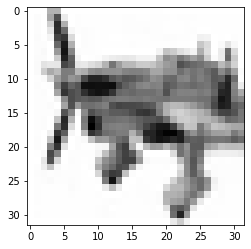

In [98]:
img, _ = cifar2[11]
plt.imshow(img.mean(0), cmap='gray')
plt.show()

output=loaded_model(img.unsqueeze(0))
output

In [94]:
for img, _ in cifar2[:100]:
    output=loaded_model(img.unsqueeze(0))
    print(output)

tensor([[-5.0923,  5.3330]], grad_fn=<AddmmBackward0>)
tensor([[-3.1638,  3.1543]], grad_fn=<AddmmBackward0>)
tensor([[-2.8469,  2.8259]], grad_fn=<AddmmBackward0>)
tensor([[-5.2449,  5.6438]], grad_fn=<AddmmBackward0>)
tensor([[ 2.4443, -2.0572]], grad_fn=<AddmmBackward0>)
tensor([[ 3.0532, -2.4389]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5370, -0.2687]], grad_fn=<AddmmBackward0>)
tensor([[-2.9177,  3.2152]], grad_fn=<AddmmBackward0>)
tensor([[-3.5372,  3.6225]], grad_fn=<AddmmBackward0>)
tensor([[-0.2956,  0.4605]], grad_fn=<AddmmBackward0>)
tensor([[-5.0274,  5.4765]], grad_fn=<AddmmBackward0>)
tensor([[ 4.7862, -4.1411]], grad_fn=<AddmmBackward0>)
tensor([[-7.9864,  8.1286]], grad_fn=<AddmmBackward0>)
tensor([[-8.7681,  8.8945]], grad_fn=<AddmmBackward0>)
tensor([[-5.6638,  5.9298]], grad_fn=<AddmmBackward0>)
tensor([[-8.3311,  8.7668]], grad_fn=<AddmmBackward0>)
tensor([[ 5.0628, -4.3341]], grad_fn=<AddmmBackward0>)
tensor([[-1.1760,  1.4110]], grad_fn=<AddmmBackward0>)
tensor([[ 

In [99]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")  # I DON'T HAVE A GPU XD

Training on device cpu.
